In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC


import warnings
warnings.filterwarnings(action='ignore') 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [277]:
x_train, x_test, y_train, y_test = my.get_iris()

In [278]:
print(x_train.shape, y_train.shape)

(120, 4) (120,)


# 정규화

In [279]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

x_train[:4]

array([[0.33333333, 0.625     , 0.05084746, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.94444444, 0.25      , 1.        , 0.91666667],
       [0.44444444, 0.5       , 0.6440678 , 0.70833333]])

In [280]:
y_train = y_train.values
y_train

array([0, 0, 2, 1, 0, 0, 2, 1, 1, 1, 1, 1, 0, 1, 2, 2, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 2, 2, 1, 0, 1, 1, 1, 2, 1, 0, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 0, 2, 2, 2, 1, 1, 1, 2, 1, 0, 1, 2, 0, 1, 2, 2, 2, 1, 0, 0, 0,
       0, 2, 2, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 1, 2, 2, 1, 0, 2, 2, 2,
       0, 1, 0, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 1, 1, 0, 2,
       0, 0, 0, 2, 0, 1, 0, 2, 1, 2], dtype=int64)

In [281]:
clf = SVC(kernel = 'linear' , random_state = 2022)
clf.fit(x_train, y_train)

SVC(kernel='linear', random_state=2022)

In [282]:
clf.score(x_train, y_train)

0.9666666666666667

In [283]:
clf.coef_

array([[-0.71911209,  1.49501473, -2.22753921, -1.67567698],
       [-0.77773379,  0.55948611, -1.61246044, -1.41653471],
       [-0.78659984,  0.29166667, -2.89422478, -3.73707565]])

In [284]:
clf.intercept_

array([0.74587087, 1.22499005, 4.79311661])

### 최종

In [285]:
x_test = scaler.transform(x_test)
y_test = y_test.values

In [286]:
clf.score(x_test, y_test)

0.9333333333333333

In [287]:
y_pred = clf.predict(x_test)
clf.score(x_test, y_pred)

1.0

In [288]:
my.print_score(y_test, y_pred, average = 'macro')

accuraccy: 0.9333333333333333
precision: 0.9583333333333334
recall: 0.9166666666666666


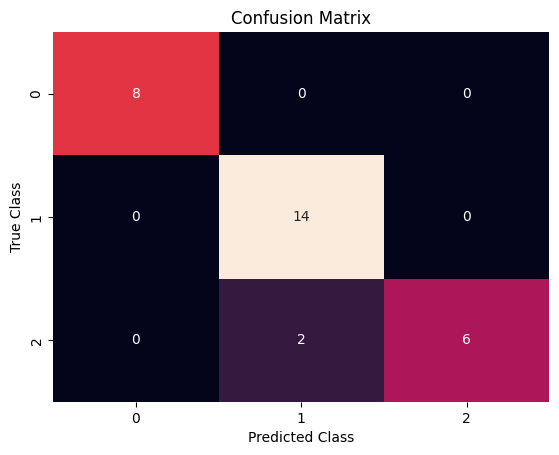

In [289]:
my.plot_confusion_matrix(y_test, y_pred)

In [290]:
x_train, x_test, y_train, y_test = my.get_iris()

In [291]:
x_train.shape

(120, 4)

In [292]:
scaler = StandardScaler()

In [293]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_train.shape

(120, 4)

In [294]:
y_train = y_train.values

In [295]:
y_train

array([2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 0, 1,
       0, 1, 2, 2, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 1, 2, 2, 1, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 0, 2, 2, 1,
       1, 1, 1, 1, 0, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0,
       1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0,
       0, 2, 1, 1, 1, 2, 0, 2, 2, 2], dtype=int64)

In [296]:
clf.score(x_train, y_train)
# scaler로 정규화하면서
# fit에서 평균과 표준편차를 구하고
# transform에서 x_train의 원소들을 정규화 수식을 이용하여
# 전체 원소를 변경시킨다.
# clf.score을 통해 변경된 x_train의 변경 된 원소들과
# y_train을 넘파이배열로 변경시킨것과
# 일단 매칭을 시켜보고
# 아래에서 predict를 통해
# 컴퓨터에게 학습시킨것에 대해서
# 예측해보라고 y_pred를 설정하고,
# y_pred(정규화 처리된 x_test(test도 scaler처리함)의 값을 이용한 컴퓨터가 예측한 값)과
# y_test(y의 실제 데이터값, 테스트 데이터)를 비교하여 결과를 확인하는것이
# 머신러닝이다.

0.9416666666666667

In [297]:
x_test = scaler.transform(x_test)

In [298]:
y_pred = clf.predict(x_test)

In [299]:
clf.score(x_test, y_pred)
# 원래 결과를 확인 할 때는 테스트 데이터 x_test를
# scaler를 통해 정규화를 시켜
# 비교시키면 된다.
# 컴퓨터가 학습하는 구간은 scaler.fit이므로
# 학습된 데이터를
# transform을 통해 x_test에 적용시키면 된다.

1.0

### 모델 준비

In [300]:
from sklearn.svm import LinearSVC

names = ['liner', 'linearSVC', 'Poly', 'rbf', 'knn-5']

models = [
    SVC(kernel = 'linear', C=1),
    LinearSVC(C=1, max_iter=1000),
    SVC(kernel = 'poly', degree=3),
    SVC(kernel = 'rbf', C=1, gamma=0.7),
    KNeighborsClassifier(n_neighbors=5)
]

scores = {}
for name, model in zip(names, models):
    model.fit(x_train, y_train)
    s = model.score(x_train, y_train)
    print(name, s)
    scores[name] = s

liner 0.9583333333333334
linearSVC 0.9583333333333334
Poly 0.9583333333333334
rbf 0.9833333333333333
knn-5 0.9666666666666667


In [301]:
scores

{'liner': 0.9583333333333334,
 'linearSVC': 0.9583333333333334,
 'Poly': 0.9583333333333334,
 'rbf': 0.9833333333333333,
 'knn-5': 0.9666666666666667}

<AxesSubplot: ylabel='Count'>

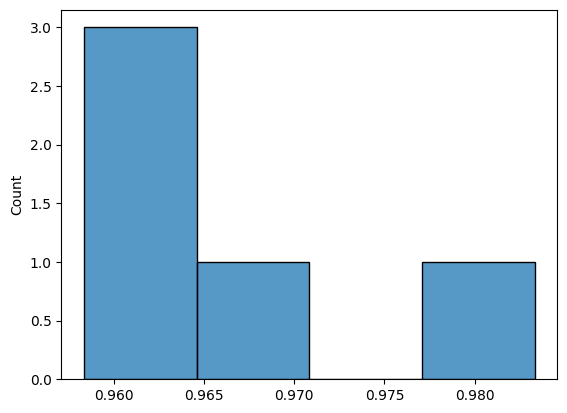

In [302]:
sns.histplot(data = scores)

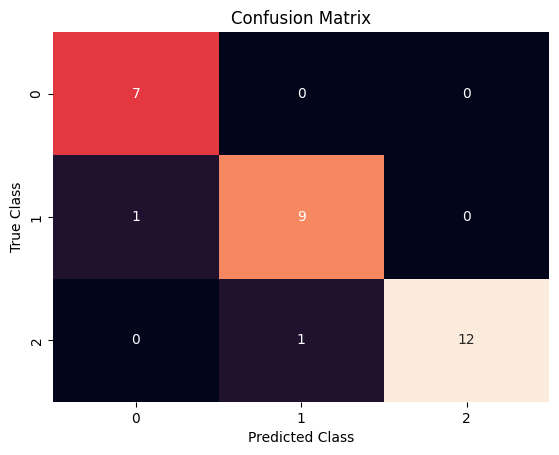

In [303]:
my.plot_confusion_matrix(y_test, y_pred)

### GridSearch

In [304]:
type(x_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [305]:
param_range = [0.001, 0.02, 0.1, 1, 10, 100, 100]

params = [
    {
        'C' : param_range,
        'gamma' : param_range,
        'kernel' : ['rbf']
    },
    {
        'C' : param_range,
        'kernel' : ['linear']
    },
    {
        'C' : param_range,
        'degree' : [2, 3],
        'kernel' : ['poly']
    }
]

In [306]:
from sklearn.model_selection import GridSearchCV

clf = SVC(random_state = 2022)
gs = GridSearchCV(estimator = clf,
                  param_grid = params,
                  scoring = 'accuracy',
                  cv = 3,
                  n_jobs=-1,
                  verbose=3
            )
gs.fit(x_train, y_train)

Fitting 3 folds for each of 70 candidates, totalling 210 fits


GridSearchCV(cv=3, estimator=SVC(random_state=2022), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.02, 0.1, 1, 10, 100, 100],
                          'gamma': [0.001, 0.02, 0.1, 1, 10, 100, 100],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.02, 0.1, 1, 10, 100, 100],
                          'kernel': ['linear']},
                         {'C': [0.001, 0.02, 0.1, 1, 10, 100, 100],
                          'degree': [2, 3], 'kernel': ['poly']}],
             scoring='accuracy', verbose=3)

In [307]:
gs.best_estimator_

SVC(C=100, gamma=0.02, random_state=2022)

In [308]:
gs.best_score_

0.975

In [309]:
gs.best_params_

{'C': 100, 'gamma': 0.02, 'kernel': 'rbf'}

### 재학습

In [310]:
clf = SVC(C= 10, gamma = 0.02, kernel = 'rbf', random_state = 2022)
clf.fit(x_train, y_train)

SVC(C=10, gamma=0.02, random_state=2022)

In [311]:
clf.score(x_train, y_train)

0.9666666666666667

In [312]:
clf.score(x_test, y_test)

1.0

In [313]:
x_test = scaler.transform(x_test)
y_test = y_test.values

In [314]:
clf.score(x_test, y_test)

0.7333333333333333

In [315]:
from sklearn.model_selection import RandomizedSearchCV

In [316]:
param_range = np.arange(0.001, 100)

params = [
    {
        'C' : param_range,
        'gamma' : param_range,
        'kernel' : ['rbf']
    },
    {
        'C' : param_range,
        'kernel' : ['linear']
    },
    {
        'C' : param_range,
        'degree' : [2, 3],
        'kernel' : ['poly']
    }
]

In [317]:


clf = SVC(random_state = 2022)
gs = RandomizedSearchCV(estimator = clf,
                  param_distributions = params,
                  scoring = 'accuracy',
                  cv = 3,
                  n_jobs=-1,
                  verbose=3
            )
gs.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=SVC(random_state=2022), n_jobs=-1,
                   param_distributions=[{'C': array([1.0000e-03, 1.0010e+00, 2.0010e+00, 3.0010e+00, 4.0010e+00,
       5.0010e+00, 6.0010e+00, 7.0010e+00, 8.0010e+00, 9.0010e+00,
       1.0001e+01, 1.1001e+01, 1.2001e+01, 1.3001e+01, 1.4001e+01,
       1.5001e+01, 1.6001e+01, 1.7001e+01, 1.8001e+01, 1.9001e+01,
       2.0001e+01, 2.1001e+01, 2.2001e+...
       7.0001e+01, 7.1001e+01, 7.2001e+01, 7.3001e+01, 7.4001e+01,
       7.5001e+01, 7.6001e+01, 7.7001e+01, 7.8001e+01, 7.9001e+01,
       8.0001e+01, 8.1001e+01, 8.2001e+01, 8.3001e+01, 8.4001e+01,
       8.5001e+01, 8.6001e+01, 8.7001e+01, 8.8001e+01, 8.9001e+01,
       9.0001e+01, 9.1001e+01, 9.2001e+01, 9.3001e+01, 9.4001e+01,
       9.5001e+01, 9.6001e+01, 9.7001e+01, 9.8001e+01, 9.9001e+01]),
                                         'degree': [2, 3],
                                         'kernel': ['poly']}],
                   scoring='accuracy', verbose=3)

In [318]:
gs.best_score_

0.9499999999999998

In [319]:
gs.best_params_

{'kernel': 'rbf', 'gamma': 4.0009999999999994, 'C': 37.00099999999999}